# Analysis of a sprint test

<b>Protocol ergometer:</b>
resistance mode

<b>Description of the sprint test: </b>
Participants are asked to sprint as fast as possible for x seconds.

<b>Outcome: </b>
Velocity, power and distance related output

First, let us import the right package(s) and define the data file

In [1]:
import worklab as wl
import pandas as pd
import os

filename = os.getcwd()
filename = os.path.join('r',filename, 'example_data', 'Sprint test_example.xls')

Let's define some sprint-specific variables (you can alternatively store these in a seperate file)

In [2]:
start = 30  # s, start time sprint
duration = 10  # s, duration sprint
half = 5  #s, duration half sprint

Import and process data ergometer:

In [3]:
wheelchair = wl.com.load_wheelchair(filename)
data = wl.com.load_esseda(filename)
data = wl.kin.filter_ergo(data)
data = wl.kin.process_ergo(data, wheelsize=wheelchair['wheelsize'], rimsize=wheelchair['rimsize'])
data = wl.ana.mean_data(data)
data = wl.ana.cut_data(data, start, start+duration)
for side in data:
        data[side]['speed'] = data[side]['speed'] * 3.6

Now, we can do a push-by-push analyses and visualize it, we can see whether all pushes have been found.
If not, there are a few settings of the wil.kin.push_by_push_ergo() you can modify: look for it in the documentation:cutoff, minpeak, mindist.


Found left: 20 , right: 20 and mean: 20 pushes!



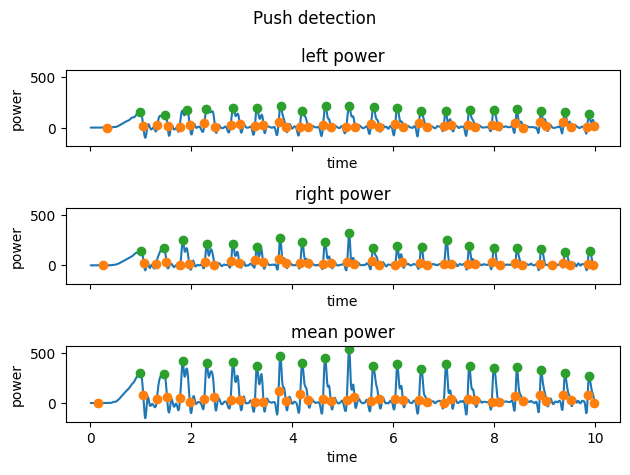

In [4]:
data_pbp = wl.kin.push_by_push_ergo(data)
pushes_sprint = wl.plots.plot_pushes_ergo(data, data_pbp)

After this, we can visualize the sprint test and calculate the outcome parameters:

   distance_half  distance_half_l  distance_half_r  distance  distance_l   
0            9.3              9.1              9.5      25.0        24.5  \

   distance_r  max_vel  max_vel_l  max_vel_r  mean_vel  mean_vel_l   
0        25.5     12.1       11.8       12.4       9.0         8.8  \

   mean_vel_r  max_power  max_power_l  max_power_r  mean_power  mean_power_l   
0         9.2      535.0        214.0        321.0        69.0          33.0  \

   mean_power_r  maxpowerafter3  maxpowerafter3_l  maxpowerafter3_r   
0          36.0           414.0             173.0             250.0  \

   maxvelafter3  maxvelafter3_l  maxvelafter3_r  ctime  p_time  
0           6.8             6.6             7.1   0.51    0.19  


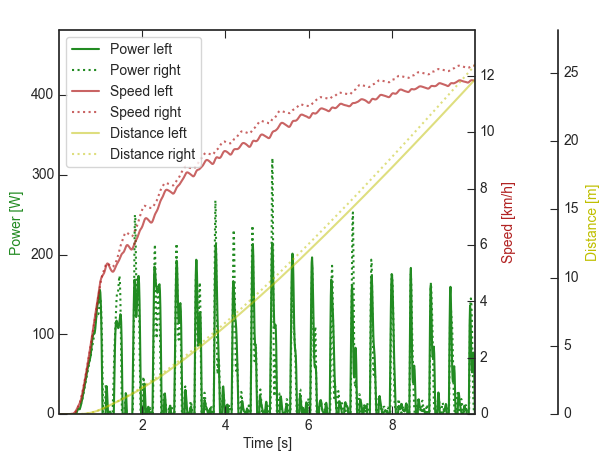

In [5]:
fig_sprint, outcomes = wl.ana.ana_sprint(data, data_pbp, half=half)
pd.set_option('display.max_columns', 50)
print(outcomes)

Now we have visualised the sprint en calculated the main outcomes! If you are interested in more specific variables, feel free to calculate them yourself!